# Exercise 6.1 Sourcing Open Data

## Contents:

1. Import Libraries
2. Creating a path and Checking the Data
3. Data Exploration
4. Checking for Missing Values
5. Checking for duplicates, mixed-type data, and performing data transformations
6. Addressing errors and inconsistencies
7. Checking the Outliers
8. Exporting the Dataset

## 1. Import Libraries

In [69]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Creating a path and Checking the Data

In [70]:
path = r'C:\Users\rajkaran\Documents\CareerFoundry- Data Analytics Program\2. Data Immersion\Achievements 6 - Tasks\3. Data\Original Data'

In [71]:
print(path)

C:\Users\rajkaran\Documents\CareerFoundry- Data Analytics Program\2. Data Immersion\Achievements 6 - Tasks\3. Data\Original Data


In [72]:
# Reading CSV files - COVID-19_2020-2023
df_covid = pd.read_csv(os.path.join(path,'COVID-19_2020-2023.csv'), index_col = False)

In [73]:
# Checking the dataset
df_covid.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0,NaN
1,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0,NaN
2,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0,NaN
3,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0,NaN
4,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0,NaN


In [74]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621000 entries, 0 to 620999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          621000 non-null  object 
 1   Start Date          621000 non-null  object 
 2   End Date            621000 non-null  object 
 3   Group               621000 non-null  object 
 4   Year                608580 non-null  float64
 5   Month               558900 non-null  float64
 6   State               621000 non-null  object 
 7   Condition Group     621000 non-null  object 
 8   Condition           621000 non-null  object 
 9   ICD10_codes         621000 non-null  object 
 10  Age Group           621000 non-null  object 
 11  COVID-19 Deaths     437551 non-null  float64
 12  Number of Mentions  443423 non-null  float64
 13  Flag                183449 non-null  object 
dtypes: float64(4), object(10)
memory usage: 66.3+ MB


In [75]:
df_covid.shape

(621000, 14)

## 3. Data Exploration

1. Categorical Variables:
State
Condition Group
Condition
ICD10_codes
Age Group
Flag
2. Numerical Variables:
Year
Month
COVID-19 Deaths
Number of Mentions
3. Date Variables:
Data As Of
Start Date
End Date

In [76]:
# Check basic statistics of the dataset
df_covid.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,608580.000000,558900.000000,4.375510e+05,4.434230e+05
mean,2021.408163,6.200000,1.201179e+02,1.293348e+02
std,1.086436,3.350625,2.980201e+03,3.203936e+03
min,2020.000000,1.000000,0.000000e+00,0.000000e+00
25%,2020.000000,3.000000,0.000000e+00,0.000000e+00
50%,2021.000000,6.000000,0.000000e+00,0.000000e+00
75%,2022.000000,9.000000,1.800000e+01,1.900000e+01
max,2023.000000,12.000000,1.146242e+06,1.146242e+06


The distributions of Year and Month are as expected, with years ranging from 2020 to 2023 and months from 1 (January) to 12 (December). The columns for COVID-19 Deaths and Number of Mentions show a significant number of zeros (with a median of 0) but also exhibit high maximum values, indicating substantial variability. To better understand the data, I will examine histograms and box plots of the numerical variables.

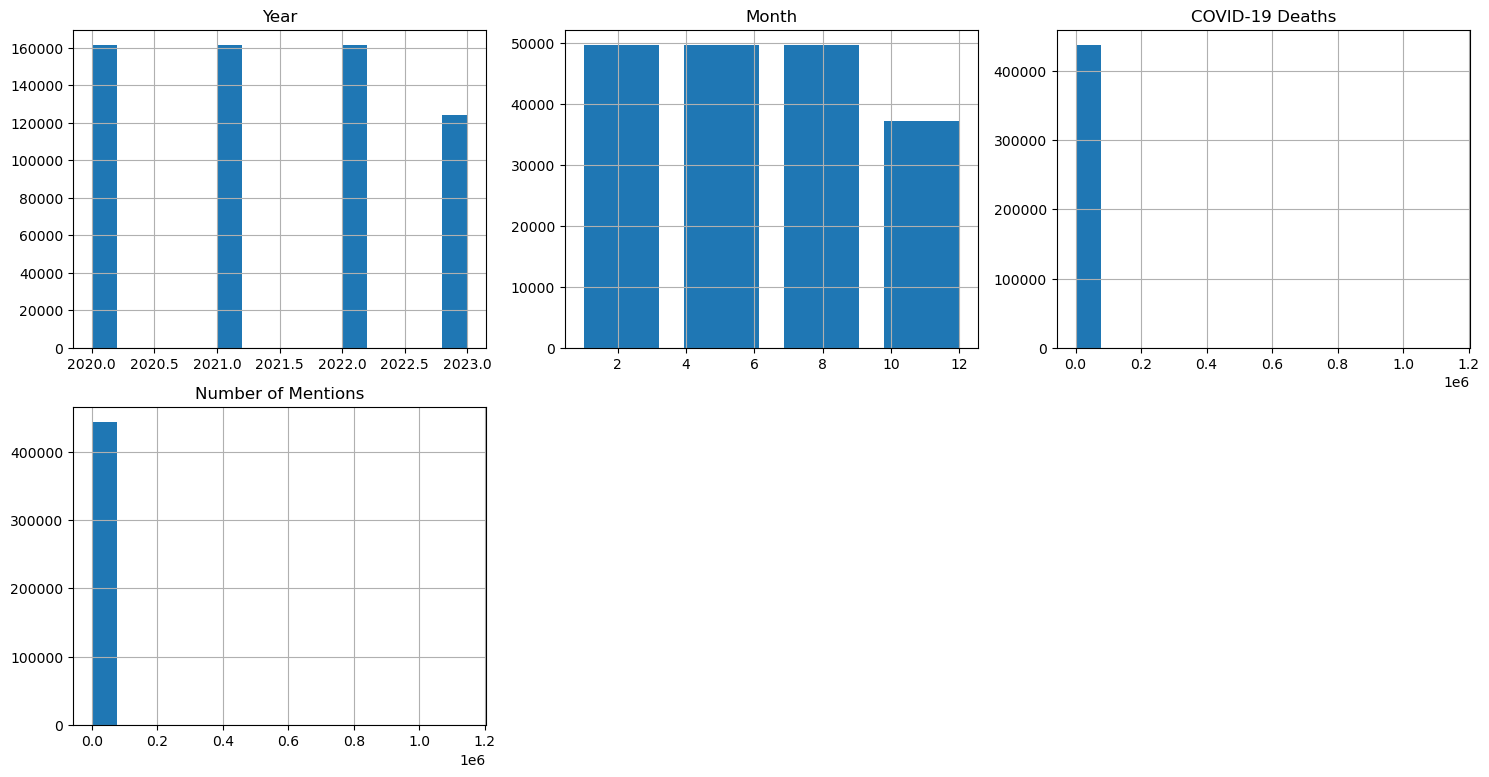

In [77]:
# Plot histograms for all numerical columns
df_covid.hist(bins=15, figsize=(15, 15), layout=(4, 3))
plt.tight_layout()
plt.show()

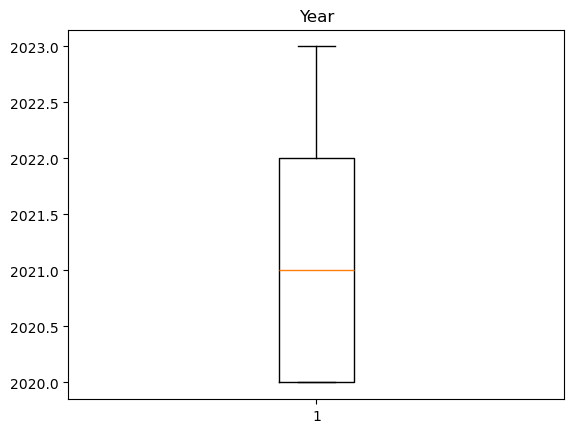

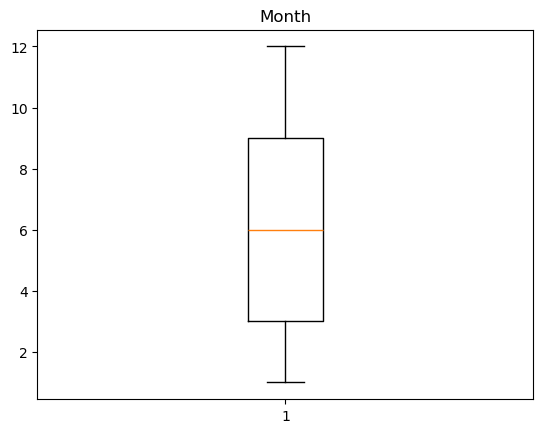

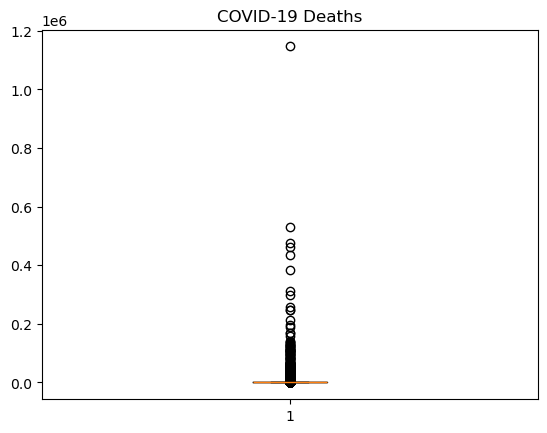

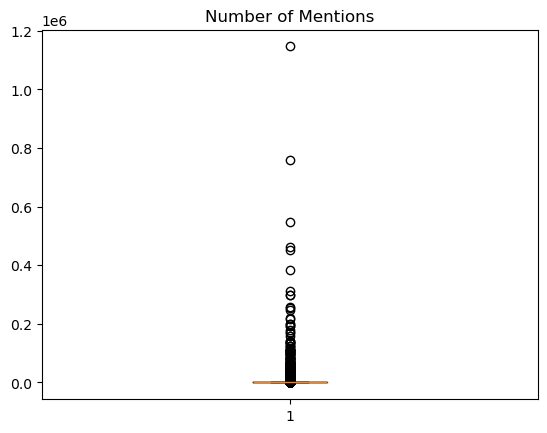

In [78]:
# Creating box plots for the numerical variables:
plt.boxplot(df_covid['Year'].dropna())
plt.title('Year')
plt.show()

plt.boxplot(df_covid['Month'].dropna())
plt.title('Month')
plt.show()

plt.boxplot(df_covid['COVID-19 Deaths'].dropna())
plt.title('COVID-19 Deaths')
plt.show()

plt.boxplot(df_covid['Number of Mentions'].dropna())
plt.title('Number of Mentions')
plt.show()

Both COVID-19 Deaths and Number of Mentions are found to be highly right-skewed, with a significant number of outliers. The distributions of Year and Month are observed to align with expectations. The frequency counts for the categorical variables will now be examined.

In [79]:
# Perform frequency counts on the categorical variables
print(df_covid['State'].value_counts(dropna=False))

print(df_covid['Condition Group'].value_counts(dropna=False))

print(df_covid['Condition'].value_counts(dropna=False))

print(df_covid['ICD10_codes'].value_counts(dropna=False))

print(df_covid['Age Group'].value_counts(dropna=False))

print(df_covid['Flag'].value_counts(dropna=False))

State
United States           11500
Pennsylvania            11500
Nevada                  11500
New Hampshire           11500
New Jersey              11500
New Mexico              11500
New York                11500
New York City           11500
North Carolina          11500
North Dakota            11500
Ohio                    11500
Oklahoma                11500
Oregon                  11500
Rhode Island            11500
Alabama                 11500
South Carolina          11500
South Dakota            11500
Tennessee               11500
Texas                   11500
Utah                    11500
Vermont                 11500
Virginia                11500
Washington              11500
West Virginia           11500
Wisconsin               11500
Wyoming                 11500
Nebraska                11500
Montana                 11500
Missouri                11500
Mississippi             11500
Alaska                  11500
Arizona                 11500
Arkansas                11500
Cali

The distribution of records appears to be very uniform across states, condition groups, conditions, ICD-10 codes, and age groups. The Flag column is predominantly composed of missing values, which is favorable since the flag indicates that data was suppressed for confidentiality.

## 4. Checking for Missing Values

In [80]:
# Check the data for missing values
df_covid.isnull().sum()

Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                   12420
Month                  62100
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths       183449
Number of Mentions    177577
Flag                  437551
dtype: int64

Year: 12,420
Month: 62,100
COVID-19 Deaths: 183,449
Number of Mentions: 177,577
Flag: 437,551

Upon closer examination of the rows with missing values in the Year column, it is observed that these are all part of the "By Total" group, indicating that the Year column is empty because these rows represent an aggregation. Similarly, the missing values in the Month column correspond to instances where the Group column is either "By Total" or "By Year," again indicating that these rows represent aggregated data. By removing these rows of aggregated data, the missing values in both the Year and Month columns will be addressed, leading to more accurate descriptive statistics for the dataset.

In [81]:
# Separate the dataframe into two parts, one that includes Group only "By Month" and one that includes Group "By Total" and "By Year"
df_covid_month = df_covid[df_covid['Group'] == 'By Month']
df_covid_total_year = df_covid[df_covid['Group'].isin(['By Total', 'By Year'])]

In [82]:
# Verify the separation
df_covid_month.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558900 entries, 62100 to 620999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          558900 non-null  object 
 1   Start Date          558900 non-null  object 
 2   End Date            558900 non-null  object 
 3   Group               558900 non-null  object 
 4   Year                558900 non-null  float64
 5   Month               558900 non-null  float64
 6   State               558900 non-null  object 
 7   Condition Group     558900 non-null  object 
 8   Condition           558900 non-null  object 
 9   ICD10_codes         558900 non-null  object 
 10  Age Group           558900 non-null  object 
 11  COVID-19 Deaths     388500 non-null  float64
 12  Number of Mentions  393720 non-null  float64
 13  Flag                170400 non-null  object 
dtypes: float64(4), object(10)
memory usage: 64.0+ MB


In [83]:
df_covid_total_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62100 entries, 0 to 62099
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data As Of          62100 non-null  object 
 1   Start Date          62100 non-null  object 
 2   End Date            62100 non-null  object 
 3   Group               62100 non-null  object 
 4   Year                49680 non-null  float64
 5   Month               0 non-null      float64
 6   State               62100 non-null  object 
 7   Condition Group     62100 non-null  object 
 8   Condition           62100 non-null  object 
 9   ICD10_codes         62100 non-null  object 
 10  Age Group           62100 non-null  object 
 11  COVID-19 Deaths     49051 non-null  float64
 12  Number of Mentions  49703 non-null  float64
 13  Flag                13049 non-null  object 
dtypes: float64(4), object(10)
memory usage: 7.1+ MB


In [84]:
# Check the total rows add up correctly
len(df_covid)

621000

In [85]:
len(df_covid_month) + len(df_covid_total_year)

621000

Recheck the number of missing values in the separated "df_covid_month" dataframe

In [86]:
# Check for missing values
df_covid_month.isnull().sum()

Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                       0
Month                      0
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths       170400
Number of Mentions    165180
Flag                  388500
dtype: int64

The missing values in the COVID-19 Deaths and Number of Mentions columns appear to correspond with instances where the Flag column indicates, "One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards." Therefore, a random number between 1 and 9 will be imputed into the missing values of COVID-19 Deaths and Number of Mentions when the flag indicator is present.

In [87]:
# Define a function to generate random integers between 1 and 9
def random_1_to_9(series):
    return series.apply(lambda x: np.random.randint(1, 10) if pd.isnull(x) else x)

In [88]:
# Identify rows with suppression flag
suppression_message = "One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards."
suppressed_rows = df_covid_month[df_covid_month['Flag'] == suppression_message]

In [89]:
# Impute only the missing values in COVID-19 Deaths and Number of Mentions with a random number between 1-9
df_covid_month.loc[suppressed_rows.index, 'COVID-19 Deaths'] = random_1_to_9(suppressed_rows['COVID-19 Deaths'])
df_covid_month.loc[suppressed_rows.index, 'Number of Mentions'] = random_1_to_9(suppressed_rows['Number of Mentions'])

Verify the changes by comparing the number of cells with values between 1 and 9 to the number of missing values in each column before imputation.

In [90]:
# Verify the changes by rechecking the descriptive statistics
df_covid_month.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,558900.000000,558900.000000,558900.000000,558900.000000
mean,2021.400000,6.200000,32.240306,35.050997
std,1.083206,3.350625,483.282489,518.791707
min,2020.000000,1.000000,0.000000,0.000000
25%,2020.000000,3.000000,0.000000,0.000000
50%,2021.000000,6.000000,1.000000,1.000000
75%,2022.000000,9.000000,8.000000,8.000000
max,2023.000000,12.000000,105566.000000,105566.000000


In [91]:
# Verify the changes by checking value counts
print(df_covid_month['COVID-19 Deaths'].value_counts().sort_index())
print(df_covid_month['Number of Mentions'].value_counts().sort_index())

COVID-19 Deaths
0.0         275134
1.0          19308
2.0          19181
3.0          19145
4.0          19066
             ...  
63446.0          1
65477.0          1
83984.0          1
98080.0          1
105566.0         1
Name: count, Length: 2726, dtype: int64
Number of Mentions
0.0         275134
1.0          18668
2.0          18703
3.0          18507
4.0          18506
             ...  
65364.0          1
65477.0          1
83984.0          1
98080.0          1
105566.0         1
Name: count, Length: 2875, dtype: int64


In [92]:
# Recheck for missing values in the dataframe
df_covid_month.isnull().sum()

Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                       0
Month                      0
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths            0
Number of Mentions         0
Flag                  388500
dtype: int64

The only missing values remaining are in the Flag column and are expected, so no further action is necessary.

## 5. Checking for duplicates, mixed-type data, and performing data transformations

In [93]:
# Check for duplicate rows in the dataset
df_covid_month.duplicated().sum()

0

In [94]:
# Check for any mixed-type columns
for col in df_covid_month.columns.tolist():
    weird = (df_covid_month[[col]].map(type) != df_covid_month[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df_covid_month[weird]) > 0:
        print (f"Mixed-type data found in column: {col}")
    else: print(f"No mixed-type data in column: {col}")

No mixed-type data in column: Data As Of
No mixed-type data in column: Start Date
No mixed-type data in column: End Date
No mixed-type data in column: Group
No mixed-type data in column: Year
No mixed-type data in column: Month
No mixed-type data in column: State
No mixed-type data in column: Condition Group
No mixed-type data in column: Condition
No mixed-type data in column: ICD10_codes
No mixed-type data in column: Age Group
No mixed-type data in column: COVID-19 Deaths
No mixed-type data in column: Number of Mentions
Mixed-type data found in column: Flag


In [95]:
# Check the data-types of the dataframe
print(df_covid_month.dtypes)

Data As Of             object
Start Date             object
End Date               object
Group                  object
Year                  float64
Month                 float64
State                  object
Condition Group        object
Condition              object
ICD10_codes            object
Age Group              object
COVID-19 Deaths       float64
Number of Mentions    float64
Flag                   object
dtype: object


In [96]:
# Convert date columns to datetime
df_covid_month.loc[:, 'Data As Of'] = pd.to_datetime(df_covid_month['Data As Of'])
df_covid_month.loc[:, 'Start Date'] = pd.to_datetime(df_covid_month['Start Date'])
df_covid_month.loc[:, 'End Date'] = pd.to_datetime(df_covid_month['End Date'])

In [97]:
# Convert categorical columns to category type for improved memory efficiency using .loc 
categorical_columns = ['State', 'Condition Group', 'Condition', 'ICD10_codes', 'Age Group', 'Flag']
for column in categorical_columns:
    df_covid_month.loc[:, column] = df_covid_month[column].astype('category')

In [98]:
# Recheck for mixed-type data
for col in df_covid_month.columns.tolist():
    weird = (df_covid_month[[col]].map(type) != df_covid_month[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df_covid_month[weird]) > 0:
        print (f"Mixed-type data found in column: {col}")
    else: print(f"No mixed-type data in column: {col}")

No mixed-type data in column: Data As Of
No mixed-type data in column: Start Date
No mixed-type data in column: End Date
No mixed-type data in column: Group
No mixed-type data in column: Year
No mixed-type data in column: Month
No mixed-type data in column: State
No mixed-type data in column: Condition Group
No mixed-type data in column: Condition
No mixed-type data in column: ICD10_codes
No mixed-type data in column: Age Group
No mixed-type data in column: COVID-19 Deaths
No mixed-type data in column: Number of Mentions
Mixed-type data found in column: Flag


In [99]:
# Recheck the data-types
print(df_covid_month.dtypes)

Data As Of             object
Start Date             object
End Date               object
Group                  object
Year                  float64
Month                 float64
State                  object
Condition Group        object
Condition              object
ICD10_codes            object
Age Group              object
COVID-19 Deaths       float64
Number of Mentions    float64
Flag                   object
dtype: object


In [100]:
# Drop the Group column as it only contains "By Month" and is no longer necessary for sorting/filtering
df_covid_month = df_covid_month.drop(columns=['Group'])

In [101]:
# Verify the changes
print(df_covid_month.columns)

Index(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State',
       'Condition Group', 'Condition', 'ICD10_codes', 'Age Group',
       'COVID-19 Deaths', 'Number of Mentions', 'Flag'],
      dtype='object')


## 6. Addressing errors and inconsistencies

Check the data for inconsistencies by reviewing the unique values of categorical columns and the basic statistics of numerical columns.

In [102]:
# Unique values for categorical columns
unique_covid = {col: df_covid_month[col].unique() for col in ['State', 'Condition Group', 'Condition', 'ICD10_codes', 'Age Group', 'Flag']}
for col, values in unique_covid.items():
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(values)}")
    print("Unique values:")
    for value in values:
        print(f"  - {value}")


Column: State
Number of unique values: 54
Unique values:
  - United States
  - Alabama
  - Alaska
  - Arizona
  - Arkansas
  - California
  - Colorado
  - Connecticut
  - Delaware
  - District of Columbia
  - Florida
  - Georgia
  - Hawaii
  - Idaho
  - Illinois
  - Indiana
  - Iowa
  - Kansas
  - Kentucky
  - Louisiana
  - Maine
  - Maryland
  - Massachusetts
  - Michigan
  - Minnesota
  - Mississippi
  - Missouri
  - Montana
  - Nebraska
  - Nevada
  - New Hampshire
  - New Jersey
  - New Mexico
  - New York
  - New York City
  - North Carolina
  - North Dakota
  - Ohio
  - Oklahoma
  - Oregon
  - Pennsylvania
  - Rhode Island
  - South Carolina
  - South Dakota
  - Tennessee
  - Texas
  - Utah
  - Vermont
  - Virginia
  - Washington
  - West Virginia
  - Wisconsin
  - Wyoming
  - Puerto Rico

Column: Condition Group
Number of unique values: 12
Unique values:
  - Respiratory diseases
  - Circulatory diseases
  - Sepsis
  - Malignant neoplasms
  - Diabetes
  - Obesity
  - Alzheimer d

The State column will be cleaned by removing the aggregated rows under the "United States" entry. Since New York City data is excluded from the New York state data, the NYC rows will be retained in the DataFrame. Puerto Rico will be removed from the DataFrame to focus the analysis on the US States, while the District of Columbia will be retained for now.

In [103]:
# Filter out rows where State is "United States", "New York City", or "Puerto Rico"
df_covid_states = df_covid_month[~df_covid_month['State'].isin(['United States', 'Puerto Rico'])]

The Age Group "All Ages" represents aggregated data, and those rows will be removed to maintain consistency with the removal of other aggregated data rows in the DataFrame.

In [104]:
# Remove rows where Age Group is "All Ages"
df_covid_cleaned = df_covid_states[df_covid_states['Age Group'] != 'All Ages']

Upon closer inspection of the "Not stated" entry in the Age Group column, it is observed that these rows consistently have zero COVID-19 Deaths and zero Number of Mentions. Since rows with an Age Group of "Not stated" do not contribute meaningful information to the analysis due to the lack of associated deaths or mentions, they will be removed.

In [105]:
# Remove rows where Age Group is "Not stated"
df_covid_final_cleaned = df_covid_cleaned[df_covid_cleaned['Age Group'] != 'Not stated']

In [133]:
# Recheck the unique values for categorical columns
unique_covid_cleaned = {col: df_covid_final_cleaned[col].unique() for col in ['State', 'Condition Group', 'Condition', 'ICD10_codes', 'Age Group', 'Flag']}
for col, values in unique_covid_cleaned.items():
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(values)}")
    print("Unique values:")
    for value in values:
        print(f"  - {value}")


Column: State
Number of unique values: 52
Unique values:
  - Alabama
  - Alaska
  - Arizona
  - Arkansas
  - California
  - Colorado
  - Connecticut
  - Delaware
  - District of Columbia
  - Florida
  - Georgia
  - Hawaii
  - Idaho
  - Illinois
  - Indiana
  - Iowa
  - Kansas
  - Kentucky
  - Louisiana
  - Maine
  - Maryland
  - Massachusetts
  - Michigan
  - Minnesota
  - Mississippi
  - Missouri
  - Montana
  - Nebraska
  - Nevada
  - New Hampshire
  - New Jersey
  - New Mexico
  - New York
  - New York City
  - North Carolina
  - North Dakota
  - Ohio
  - Oklahoma
  - Oregon
  - Pennsylvania
  - Rhode Island
  - South Carolina
  - South Dakota
  - Tennessee
  - Texas
  - Utah
  - Vermont
  - Virginia
  - Washington
  - West Virginia
  - Wisconsin
  - Wyoming

Column: Condition Group
Number of unique values: 12
Unique values:
  - Respiratory diseases
  - Circulatory diseases
  - Sepsis
  - Malignant neoplasms
  - Diabetes
  - Obesity
  - Alzheimer disease
  - Vascular and unspecifie

Checking statistics of the numerical columns

In [150]:
# Statistical summaries for numerical columns
df_covid_final_cleaned[['Year', 'Month', 'COVID-19 Deaths', 'Number of Mentions']].describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,430560.000000,430560.000000,430560.000000,430560.000000
mean,2021.400000,6.200000,10.907771,11.778444
std,1.083206,3.350626,53.958885,57.090893
min,2020.000000,1.000000,0.000000,0.000000
25%,2020.000000,3.000000,0.000000,0.000000
50%,2021.000000,6.000000,1.000000,1.000000
75%,2022.000000,9.000000,7.000000,8.000000
max,2023.000000,12.000000,5094.000000,5094.000000


Summary Statistics:

Year and Month: The data is represented from 2020 to 2023. All months from January (1) to December (12) are included, except for 2023, where data collection was completed in September (9).
COVID-19 Deaths and Number of Mentions: Mean values are noted to be relatively low in comparison to the maximum values. High standard deviations are observed for both columns, indicating significant variability. The median value for both columns is 1, suggesting that at least half of the entries have non-zero values.

## 7.Checking the Outliers

Check all numerical columns for outliers according to the IQR method.

In [152]:
# First, define a function to identify outliers in numerical columns according to the IQR
def find_column_outliers_IQR(df, column):
    # Calculate Q1, Q3 and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find indices of outliers
    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    
    return df.loc[outlier_indices]

The function can now be used to check for outliers in the numerical variables:

In [153]:
# Check for outliers in Year
year_outliers = find_column_outliers_IQR(df_covid_final_cleaned, 'Year')
year_outliers

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag


No outliers found by IQR method in the "Year" column

In [154]:
# Check for outliers in "Month"
month_outliers = find_column_outliers_IQR(df_covid_final_cleaned, 'Month')
month_outliers

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag


No outliers found by IQR method in the "Month" column

In [156]:
# Check for outliers in "COVID-19 Deaths"
covid_deaths_outliers = find_column_outliers_IQR(df_covid_final_cleaned, 'COVID-19 Deaths')
covid_deaths_outliers

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
72514,2023-09-24 00:00:00,2021-08-01 00:00:00,2021-08-31 00:00:00,2021,8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,30.0,31.0,0
72552,2023-09-24 00:00:00,2021-01-01 00:00:00,2021-01-31 00:00:00,2021,1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,18.0,18.0,0
72559,2023-09-24 00:00:00,2021-08-01 00:00:00,2021-08-31 00:00:00,2021,8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,50.0,50.0,0
72560,2023-09-24 00:00:00,2021-09-01 00:00:00,2021-09-30 00:00:00,2021,9.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,53.0,56.0,0
72561,2023-09-24 00:00:00,2021-10-01 00:00:00,2021-10-31 00:00:00,2021,10.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,23.0,26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610534,2023-09-24 00:00:00,2021-08-01 00:00:00,2021-08-31 00:00:00,2021,8.0,Wyoming,COVID-19,COVID-19,U071,85+,20.0,20.0,0
610535,2023-09-24 00:00:00,2021-09-01 00:00:00,2021-09-30 00:00:00,2021,9.0,Wyoming,COVID-19,COVID-19,U071,85+,32.0,32.0,0
610536,2023-09-24 00:00:00,2021-10-01 00:00:00,2021-10-31 00:00:00,2021,10.0,Wyoming,COVID-19,COVID-19,U071,85+,47.0,47.0,0
610537,2023-09-24 00:00:00,2021-11-01 00:00:00,2021-11-30 00:00:00,2021,11.0,Wyoming,COVID-19,COVID-19,U071,85+,28.0,28.0,0


A significant number of outliers have been identified, likely due to the high number of zeros in the data. However, the values are considered reasonable in context and should be retained in the DataFrame.

In [157]:
# Check for outliers in "Number of Mentions"
mentions_outliers = find_column_outliers_IQR(df_covid_final_cleaned, 'Number of Mentions')
mentions_outliers

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
72514,2023-09-24 00:00:00,2021-08-01 00:00:00,2021-08-31 00:00:00,2021,8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,30.0,31.0,0
72559,2023-09-24 00:00:00,2021-08-01 00:00:00,2021-08-31 00:00:00,2021,8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,50.0,50.0,0
72560,2023-09-24 00:00:00,2021-09-01 00:00:00,2021-09-30 00:00:00,2021,9.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,53.0,56.0,0
72561,2023-09-24 00:00:00,2021-10-01 00:00:00,2021-10-31 00:00:00,2021,10.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,23.0,26.0,0
72596,2023-09-24 00:00:00,2020-12-01 00:00:00,2020-12-31 00:00:00,2020,12.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,29.0,29.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610527,2023-09-24 00:00:00,2021-01-01 00:00:00,2021-01-31 00:00:00,2021,1.0,Wyoming,COVID-19,COVID-19,U071,85+,33.0,33.0,0
610535,2023-09-24 00:00:00,2021-09-01 00:00:00,2021-09-30 00:00:00,2021,9.0,Wyoming,COVID-19,COVID-19,U071,85+,32.0,32.0,0
610536,2023-09-24 00:00:00,2021-10-01 00:00:00,2021-10-31 00:00:00,2021,10.0,Wyoming,COVID-19,COVID-19,U071,85+,47.0,47.0,0
610537,2023-09-24 00:00:00,2021-11-01 00:00:00,2021-11-30 00:00:00,2021,11.0,Wyoming,COVID-19,COVID-19,U071,85+,28.0,28.0,0


Similar to the COVID-19 Deaths column, a significant number of outliers have been identified in the Number of Mentions column. This is likely due to the high number of zeros in the data. The values are deemed reasonable in context and should, therefore, be retained in the DataFrame.

Final check of the dataframe before exporting

In [162]:
# Final check of the "df_covid_final_cleaned" dataframe before exporting
print(df_covid_final_cleaned.head())
print(df_covid_final_cleaned.info())
df_covid_final_cleaned.shape

                Data As Of           Start Date             End Date  Year  \
72450  2023-09-24 00:00:00  2020-01-01 00:00:00  2020-01-31 00:00:00  2020   
72451  2023-09-24 00:00:00  2020-02-01 00:00:00  2020-02-29 00:00:00  2020   
72452  2023-09-24 00:00:00  2020-03-01 00:00:00  2020-03-31 00:00:00  2020   
72453  2023-09-24 00:00:00  2020-04-01 00:00:00  2020-04-30 00:00:00  2020   
72454  2023-09-24 00:00:00  2020-05-01 00:00:00  2020-05-31 00:00:00  2020   

       Month    State       Condition Group                Condition  \
72450    1.0  Alabama  Respiratory diseases  Influenza and pneumonia   
72451    2.0  Alabama  Respiratory diseases  Influenza and pneumonia   
72452    3.0  Alabama  Respiratory diseases  Influenza and pneumonia   
72453    4.0  Alabama  Respiratory diseases  Influenza and pneumonia   
72454    5.0  Alabama  Respiratory diseases  Influenza and pneumonia   

      ICD10_codes Age Group  COVID-19 Deaths  Number of Mentions Flag  
72450     J09-J18      0-2

(430560, 13)

In [163]:
# Recheck statistics of the dataset
df_covid_final_cleaned.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,430560.000000,430560.000000,430560.000000,430560.000000
mean,2021.400000,6.200000,10.907771,11.778444
std,1.083206,3.350626,53.958885,57.090893
min,2020.000000,1.000000,0.000000,0.000000
25%,2020.000000,3.000000,0.000000,0.000000
50%,2021.000000,6.000000,1.000000,1.000000
75%,2022.000000,9.000000,7.000000,8.000000
max,2023.000000,12.000000,5094.000000,5094.000000


In [164]:
# Check counts of unique values in categorical variables
print(df_covid_final_cleaned['State'].value_counts(dropna=False))

State
Alabama                 8280
Alaska                  8280
Nevada                  8280
New Hampshire           8280
New Jersey              8280
New Mexico              8280
New York                8280
New York City           8280
North Carolina          8280
North Dakota            8280
Ohio                    8280
Oklahoma                8280
Oregon                  8280
Pennsylvania            8280
Rhode Island            8280
South Carolina          8280
South Dakota            8280
Tennessee               8280
Texas                   8280
Utah                    8280
Vermont                 8280
Virginia                8280
Washington              8280
West Virginia           8280
Wisconsin               8280
Nebraska                8280
Montana                 8280
Missouri                8280
Idaho                   8280
Arizona                 8280
Arkansas                8280
California              8280
Colorado                8280
Connecticut             8280
Delaware

In [165]:
print(df_covid_final_cleaned['Condition Group'].value_counts(dropna=False))

Condition Group
Circulatory diseases                                                         131040
Respiratory diseases                                                         112320
Sepsis                                                                        18720
Malignant neoplasms                                                           18720
Diabetes                                                                      18720
Obesity                                                                       18720
Alzheimer disease                                                             18720
Vascular and unspecified dementia                                             18720
Renal failure                                                                 18720
Intentional and unintentional injury, poisoning, and other adverse events     18720
All other conditions and causes (residual)                                    18720
COVID-19                                                    

In [166]:
print(df_covid_final_cleaned['Condition'].value_counts(dropna=False))

Condition
Influenza and pneumonia                                                      18720
Other diseases of the circulatory system                                     18720
All other conditions and causes (residual)                                   18720
Intentional and unintentional injury, poisoning, and other adverse events    18720
Renal failure                                                                18720
Vascular and unspecified dementia                                            18720
Alzheimer disease                                                            18720
Obesity                                                                      18720
Diabetes                                                                     18720
Malignant neoplasms                                                          18720
Sepsis                                                                       18720
Cerebrovascular diseases                                                     

In [167]:
print(df_covid_final_cleaned['ICD10_codes'].value_counts(dropna=False))

ICD10_codes
J09-J18                                                                                                                                                                                 18720
I00-I09, I26-I43, I51, I52, I70-I99                                                                                                                                                     18720
A00-A39, A42-B99, D00-E07, E15-E64, E70-E90, F00, F02, F04-G26, G31-H95, K00-K93, L00-M99, N00-N16, N20-N98, O00-O99, P00-P96, Q00-Q99, R00-R08, R09.0, R09.1, R09.3, R09.8, R10-R99    18720
S00-T98, V01-X59, X60-X84, X85-Y09, Y10-Y36, Y40-Y89, U01-U03                                                                                                                           18720
N17-N19                                                                                                                                                                                 18720
F01, F03                              

In [168]:
print(df_covid_final_cleaned['Age Group'].value_counts(dropna=False))

Age Group
0-24     53820
25-34    53820
35-44    53820
45-54    53820
55-64    53820
65-74    53820
75-84    53820
85+      53820
Name: count, dtype: int64


In [169]:
print(df_covid_final_cleaned['Flag'].value_counts(dropna=False))

Flag
0                                                                                                                             279731
One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.    150829
Name: count, dtype: int64


## 8. Exporting the Dataset

In [170]:
path1 = r'C:\Users\rajkaran\Documents\CareerFoundry- Data Analytics Program\2. Data Immersion\Achievements 6 - Tasks\3. Data\Prepared Data'

In [171]:
print(path1)

C:\Users\rajkaran\Documents\CareerFoundry- Data Analytics Program\2. Data Immersion\Achievements 6 - Tasks\3. Data\Prepared Data


In [172]:
# Export the "df_covid_final_cleaned" dataframe to CSV
df_covid_final_cleaned.to_csv(os.path.join(path1, 'cleaned_covid_final.csv'), index=False)